In [8]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

params = {'legend.fontsize': 16,
          'font.size' : 16.0,
          'font.family': 'sans-serif',
          'axes.labelsize': 16,
          'axes.titlesize': 16,
          'axes.axisbelow': True,
          'xtick.labelsize' :16,
          'ytick.labelsize': 16,
          'mathtext.fontset': 'cm',
          'mathtext.rm': 'sans',
          'font.variant':'small-caps',
          'image.cmap' : 'jet',
          'font.serif': 'Computer Modern Roman',
          'font.family': 'serif'
         }
rc('text', usetex=True)
matplotlib.rcParams.update(params)

In [9]:
NAUTICAL_MILES_INTERVALS = [125, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500,\
            5000, 5500, 6000, 7000, 8000, 8500]

In [10]:
def get_consumption(asset_id):
    tree = ET.parse('../aerios/data/fuels.xml')
    root = tree.getroot()
    data = ET.Element('data')
    port = root.findall(".//aircraft[@aircraft_id='"+str(asset_id)+"']")
    nautical_miles = []
    fuel_consumption = []
    for miles in NAUTICAL_MILES_INTERVALS:
        fuel_consumption.append(float( port[0].get('miles_'+str(miles))) )
        nautical_miles.append(miles)
    return nautical_miles, fuel_consumption

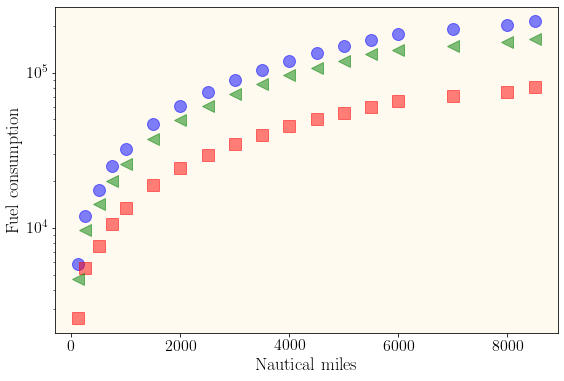

In [17]:
NM1, FC1 = get_consumption('airbus a380')
NM2, FC2 = get_consumption('boeing 787-8')
NM3, FC3 = get_consumption('boeing 747-400')

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.set_facecolor("floralwhite")
plt.semilogy(NM1, FC1, 'bo', ms=12, alpha=0.5)
plt.semilogy(NM2, FC2, 'rs', ms=12, alpha=0.5)
plt.semilogy(NM3, FC3, 'g<', ms=12, alpha=0.5)
plt.xlabel('Nautical miles', fontsize=18)
plt.ylabel('Fuel consumption', fontsize=18)
plt.show()